# First machine learning project

In [34]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm


TRAIN_DIR = "./input/train"
TEST_DIR = "./input/test"
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '6conv-basic-video')

Get the img is cat or dog?

    img.split('.')[-3] this part gives the label name from the format
    ex. suppose x = 'ok.ko.fi.si.jpg'
    then
    x.split('.')[0] = ok;
    x.split('.')[-1] = jpg;
    x.split('.')[-2] = si;
    x.split('.')[1] = ko;

In [35]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1, 0]
    elif word_label == 'dog': return [0, 1]

# Preprocessing on training data
This function generates the training data
Originially in train folder -> cat.1.jpg format
            in test folder  -> 1.jpg format
To train the data we need to do preprocessing on the images,
    1. to fit the training data we need a image (X) and its corresponding label(Y)
    {
     tqdm it provides the real time progress bar,
     IMREAD_GRAYSCALE reads the image as grayscale,
     format of cv2.resize() is -> cv2.resize(image object, (shape))
     image is of RGB example - one image object img can have a value 50 50 3
     therefore after numpying it the triplet will be stored.
    }

In [36]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)): 
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

Following shows doing grayscale removes rgb shape and becomes -> [IMG_SIZE IMG_SIZE 1]

Following code is just a research

In [53]:
path = os.path.join(TRAIN_DIR,'cat.0.jpg')
another = cv2.resize((cv2.imread(path)),(IMG_SIZE, IMG_SIZE))
print(another.shape)
img = cv2.resize((cv2.imread(path, cv2.IMREAD_GRAYSCALE)),(IMG_SIZE, IMG_SIZE))
print(img.shape)

(50, 50, 3)
(50, 50)


# Preprocessing on testing data

In [37]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
    np.save('test_data.npy', testing_data)
    return testing_data

In [20]:
#training_data = create_train_data()
training_data = np.load('train_data.npy')

# Convolutional Neural Network
    Tflearn is the framework of tensorflow which is used to implement CNN
    

In [38]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir = 'log')

In [24]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [25]:
train = training_data[:-500]
test = training_data[-500:]

This reshape is necessary because the model.fit will send the input:X to the tflearn.input_data(),

It will reshape [IMG_SIZE, IMG_SIZE] to [None, IMG_SIZE, IMG_SIZE, 1]

where the shape of the input is given as [None, IMG_SIZE, IMG_SIZE, 1]

In [55]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [56]:
model.fit({'input': X}, {'targets': Y}, n_epoch=1, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
model.save(MODEL_NAME)

Training Step: 384  | total loss: 0.67601 | time: 107.057s
| Adam | epoch: 003 | loss: 0.67601 - acc: 0.5805 -- iter: 24448/24500
Training Step: 385  | total loss: 0.67543 | time: 108.322s
| Adam | epoch: 003 | loss: 0.67543 - acc: 0.5771 | val_loss: 0.64844 - val_acc: 0.6580 -- iter: 24500/24500
--
INFO:tensorflow:/home/anshul/Documents/projects/cats_dogs/dogsvscats-0.001-6conv-basic-video.model is not in all_model_checkpoint_paths. Manually adding it.


# Enumerate
my_list = ['apple', 'banana', 'grapes', 'pear']

for c, value in enumerate(my_list, 1):

    print(c, value)

 Output:
 1 apple
 
 2 banana
 
 3 grapes
 
 4 pear

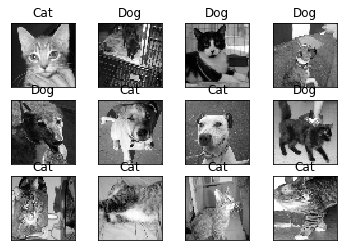

In [58]:
import matplotlib.pyplot as plt

#testing_data = process_test_data()
testing_data = np.load('test_data.npy')

fig = plt.figure()
for num, data in enumerate(testing_data[:12]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
    

In [9]:
with open('submission-file.csv', 'w') as f:
    f.write('id,label\n')

In [12]:
with open('submission-file.csv', 'a') as f:
    for data in tqdm(testing_data):
        img_num = data[1]
        img_data = data[0]
        y = fig.add_subplot(3,4,num+1)
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num, model_out[1]))


  0%|          | 0/12500 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
100%|██████████| 12500/12500 [00:47<00:00, 261.82it/s]
